In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

import pickle

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
LOCAL = False

if LOCAL:
    df = pd.read_csv('Final_df.csv')
    
else:
    df = pd.read_csv("/content/gdrive/MyDrive/capstone project/datasets/prices/Full_trial_data.csv")


In [4]:
df

,Open,Avg_score_norm,Tweet_volume_norm,next
0,0.188996,0.043308,0.022462,0.220963
1,0.220963,0.032583,0.044547,0.250412
2,0.250412,0.000000,0.041089,0.240787
3,0.240787,0.129953,0.077577,0.434098
4,0.434098,0.136786,0.059494,0.441641
...,...,...,...,...
431,0.257922,NaN,NaN,0.273545
432,0.273545,0.137809,0.255347,0.301004
433,0.301004,0.153244,0.384722,0.268667
434,0.268667,0.185499,0.564583,0.284902


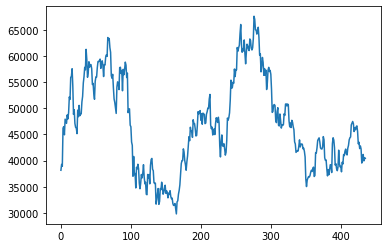

In [ ]:
df['Close'].plot()

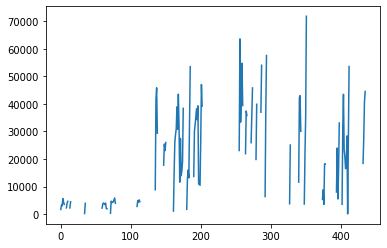

In [ ]:
df['Tweet_volume'].plot()

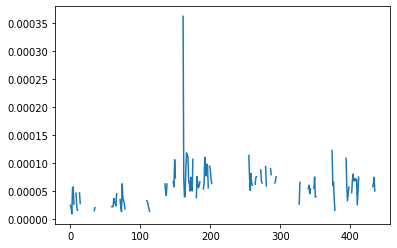

In [ ]:
df['Avg_score'].plot()

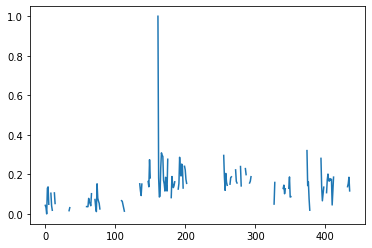

In [ ]:
df['Avg_score_norm'].plot()

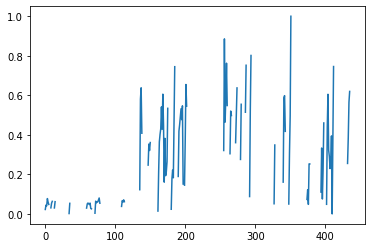

In [ ]:
df['Tweet_volume_norm'].plot()

In [ ]:
df=df.dropna(axis=0)
df

,Open,Avg_score_norm,Tweet_volume_norm,next
0,0.188996,0.043308,0.022462,0.220963
1,0.220963,0.032583,0.044547,0.250412
2,0.250412,0.000000,0.041089,0.240787
3,0.240787,0.129953,0.077577,0.434098
4,0.434098,0.136786,0.059494,0.441641
...,...,...,...,...
412,0.346733,0.186075,0.745601,0.375284
432,0.273545,0.137809,0.255347,0.301004
433,0.301004,0.153244,0.384722,0.268667
434,0.268667,0.185499,0.564583,0.284902


In [ ]:
df.index=[i for i in range(136)]

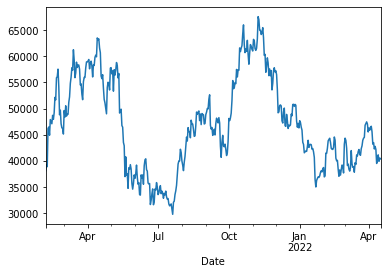

In [ ]:
df['Close'].plot()

In [ ]:
df

,Open,Avg_score_norm,Tweet_volume_norm,next
0,0.188996,0.043308,0.022462,0.220963
1,0.220963,0.032583,0.044547,0.250412
2,0.250412,0.000000,0.041089,0.240787
3,0.240787,0.129953,0.077577,0.434098
4,0.434098,0.136786,0.059494,0.441641
...,...,...,...,...
131,0.346733,0.186075,0.745601,0.375284
132,0.273545,0.137809,0.255347,0.301004
133,0.301004,0.153244,0.384722,0.268667
134,0.268667,0.185499,0.564583,0.284902


In [ ]:
# interpolate missing values 

#df.interpolate(method='time', inplace=True)

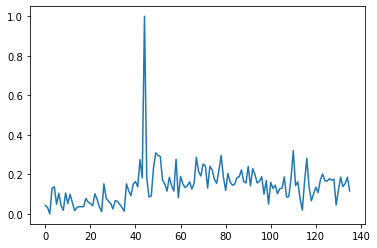

In [ ]:
df['Avg_score_norm'].plot()

In [ ]:
train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

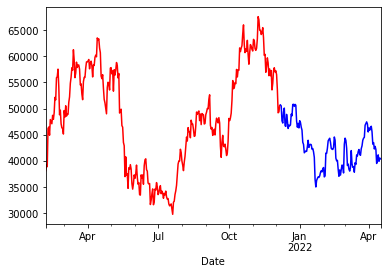

In [ ]:
train_df['next'].plot(color='red')
test_df['next'].plot(color='blue')

In [ ]:
#features & target for the model

features = ['Open'	,'Avg_score_norm'	,'Tweet_volume_norm']
target = ['next']

In [ ]:
#features & target for the model
featureScaler = StandardScaler()
targetScaler = StandardScaler()

featureScaler.fit(train_df[features])
targetScaler.fit(train_df[target])

StandardScaler()

In [ ]:
featureScaler.mean_

array([4.87576764e+04, 5.01165990e+04, 4.72002390e+04, 4.87958098e+04,
       4.62037701e+10, 1.71516880e+04, 1.49834468e-01])

In [ ]:
def create_dataset(train, test, window_size=5):
    
    trainX = featureScaler.transform(train[features])
    trainY = targetScaler.transform(train[target])
    
    testX = featureScaler.transform(test[features])
    testY = targetScaler.transform(test[target])
    
    X_train = []
    Y_train  = []
    
    X_test = []
    Y_test = []
    
    
    for i in range(len(train)-window_size):
        X_train.append(trainX[i:i+window_size])
        Y_train.append(trainY[i+window_size])
        
    for  i in range(len(test)-window_size):
        X_test.append(testX[i:i+window_size])
        Y_test.append(testY[i+window_size])
        
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    return (X_train, Y_train), (X_test, Y_test)    

In [ ]:
WINDOW=10
WINDOW_SIZE = 10

(X_train, Y_train), (X_test, Y_test) = create_dataset(train_df, test_df, WINDOW_SIZE)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(295, 10, 7) (295, 1)
(121, 10, 7) (121, 1)


In [ ]:
# Logistic Regression baseline model

regressor = LinearRegression()

In [ ]:
# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output

#train
regressor.fit(X_train.reshape(-1, 10*3), Y_train)

LinearRegression()

In [ ]:
#test
predictions = regressor.predict(X_test.reshape(-1, 10*3))

loss = mse(predictions, Y_test)

print(f'MSE for Logistic Regression Baseline : {loss}')


MSE for Logistic Regression Baseline : 0.03555573487455382


In [ ]:
pickle.dump(regressor, open('regressor.pkl', 'wb'))
pickle.dump(featureScaler, open('featureScaler.pkl', 'wb'))
pickle.dump(targetScaler, open('targetScaler.pkl', 'wb'))

In [ ]:
def plot_predictions(predictions):
    #inverse scale the predictions
    predictions = targetScaler.inverse_transform(predictions)
    predictions = pd.DataFrame([None]*WINDOW + predictions.reshape(-1).tolist(), index=test_df.index)[0]
    
    train_df['next'].plot(color='red')
    test_df['next'].plot(color='blue')
    predictions.plot(color='green')
    
def compare_pred(predictions):
    predictions = targetScaler.inverse_transform(predictions)
    predictions = pd.DataFrame([None]*WINDOW + predictions.reshape(-1).tolist(), index=test_df.index)[0]
    test_df['next'].plot(color='blue')
    predictions.plot(color='green')

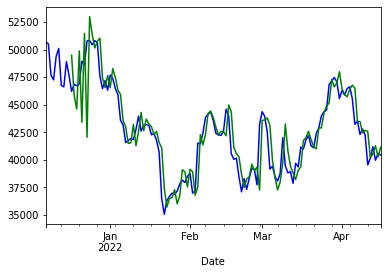

In [ ]:
compare_pred(predictions)

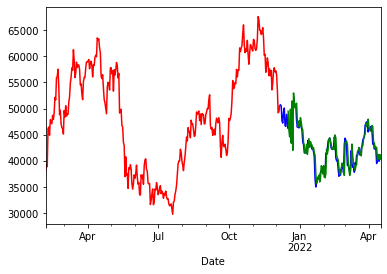

In [ ]:
plot_predictions(predictions)

In [ ]:
train_results = pd.DataFrame(data={'Train Predictions':predictions, 'Actuals':df['next']})
train_results


ValueError: ignored

In [ ]:
X_train.shape, Y_train.shape

((295, 10, 7), (295, 1))

In [ ]:
X_test.shape, Y_test.shape

((121, 10, 7), (121, 1))

In [ ]:
# recurrent model

recurrent = Sequential()
recurrent.add(InputLayer((10, 3)))
recurrent.add(GRU(64))
recurrent.add(Dense(32, 'relu'))
recurrent.add(Dense(1, 'linear'))
recurrent.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                14016     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
recurrent_c= ModelCheckpoint('recurrent/', save_best_only=True)
recurrent.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
recurrent.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, callbacks=[recurrent_c])

Epoch 1/20
 1/10 [==>...........................] - ETA: 14s - loss: 1.6007 - root_mean_squared_error: 1.2652

10/10 [==============================] - 5s 409ms/step - loss: 0.9288 - root_mean_squared_error: 0.9637 - val_loss: 0.2074 - val_root_mean_squared_error: 0.4554
Epoch 2/20
 1/10 [==>...........................] - ETA: 0s - loss: 0.3681 - root_mean_squared_error: 0.6067

10/10 [==============================] - 3s 327ms/step - loss: 0.1678 - root_mean_squared_error: 0.4097 - val_loss: 0.0680 - val_root_mean_squared_error: 0.2607
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.1119 - root_mean_squared_error: 0.3345 - val_loss: 0.0696 - val_root_mean_squared_error: 0.2639
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0725 - root_mean_squared_error: 0.2693 - val_loss: 0.0690 - val_root_mean_squared_error: 0.2628
Epoch 5/20
 1/10 [==>...........................] - ETA: 0s - loss: 0.0530 - root_mean_squared_error: 0.2303

10/10 [==============================] - 3s 324ms/step - loss: 0.0682 - root_mean_squared_error: 0.2611 - val_loss: 0.0670 - val_root_mean_squared_error: 0.2588
Epoch 6/20
 1/10 [==>...........................] - ETA: 0s - loss: 0.0434 - root_mean_squared_error: 0.2082

10/10 [==============================] - 3s 357ms/step - loss: 0.0605 - root_mean_squared_error: 0.2460 - val_loss: 0.0597 - val_root_mean_squared_error: 0.2443
Epoch 7/20
10/10 [==============================] - 0s 6ms/step - loss: 0.0573 - root_mean_squared_error: 0.2394 - val_loss: 0.0611 - val_root_mean_squared_error: 0.2472
Epoch 8/20
10/10 [==============================] - 0s 6ms/step - loss: 0.0560 - root_mean_squared_error: 0.2366 - val_loss: 0.0640 - val_root_mean_squared_error: 0.2531
Epoch 9/20
 1/10 [==>...........................] - ETA: 0s - loss: 0.0540 - root_mean_squared_error: 0.2324

10/10 [==============================] - 3s 319ms/step - loss: 0.0543 - root_mean_squared_error: 0.2330 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2365
Epoch 10/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0515 - root_mean_squared_error: 0.2270 - val_loss: 0.0621 - val_root_mean_squared_error: 0.2491
Epoch 11/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0499 - root_mean_squared_error: 0.2233 - val_loss: 0.0623 - val_root_mean_squared_error: 0.2497
Epoch 12/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0491 - root_mean_squared_error: 0.2216 - val_loss: 0.0606 - val_root_mean_squared_error: 0.2461
Epoch 13/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0478 - root_mean_squared_error: 0.2186 - val_loss: 0.0606 - val_root_mean_squared_error: 0.2462
Epoch 14/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0472 - root_mean_squared_error: 0.2172 - val_loss: 0.0588 - val_root_mean_square

10/10 [==============================] - 3s 385ms/step - loss: 0.0431 - root_mean_squared_error: 0.2075 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2357
Epoch 20/20
 1/10 [==>...........................] - ETA: 0s - loss: 0.0453 - root_mean_squared_error: 0.2129

10/10 [==============================] - 3s 328ms/step - loss: 0.0445 - root_mean_squared_error: 0.2109 - val_loss: 0.0555 - val_root_mean_squared_error: 0.2355


In [ ]:
predictions = recurrent.predict(X_test)

4/4 [==============================] - 1s 2ms/step


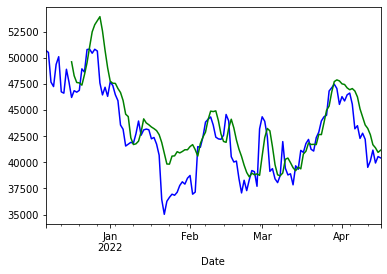

In [ ]:
compare_pred(predictions)

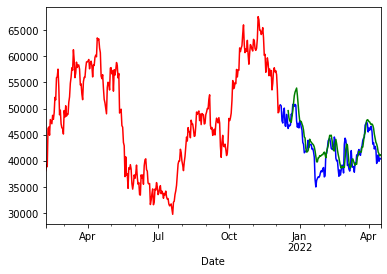

In [ ]:
plot_predictions(predictions)